In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
import shutil
from pathlib import Path
import yaml
import glob
import cv2
from google.colab.patches import cv2_imshow

#### Create YOLOv8 dataset configuration

In [ ]:
dataset_root = "/content/drive/MyDrive/Colab Notebooks/KITTI Dataset Exploration/YOLO_TRAIN_DATASET"
yaml_file = os.path.join(dataset_root, "dataset.yaml")

class_names = [
    'void', 'road', 'sidewalk', 'building', 'wall', 'fence', 'pole',
    'traffic light', 'traffic sign', 'vegetation', 'terrain', 'sky',
    'person', 'rider', 'car', 'truck', 'bus', 'train', 'motorcycle', 'bicycle'
]

config = {
    'path': os.path.abspath(dataset_root),
    'train': 'train/images',
    'val': 'val/images',
    'test': 'test/images',
    'nc': len(class_names),
    'names': class_names
}

with open(yaml_file, 'w') as f:
    yaml.dump(config, f, default_flow_style=False)

print(f"Dataset configuration saved to: {yaml_file}")

Dataset configuration saved to: /content/drive/MyDrive/Colab Notebooks/KITTI Dataset Exploration/YOLO_TRAIN_DATASET/dataset.yaml


#### Train YOLOv8 Segmentation Model

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n-seg.pt") # load a pre-trained model

results = model.train(
    data=yaml_file,
    epochs=100,
    imgsz=640,
)

100%|██████████| 6.74M/6.74M [00:00<00:00, 139MB/s]


Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Colab Notebooks/KITTI Dataset Exploration/YOLO_TRAIN_DATASET/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_ma

100%|██████████| 5.35M/5.35M [00:00<00:00, 162MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 1.4±2.1 ms, read: 95.7±58.0 MB/s, size: 748.0 KB)


train: Scanning /content/drive/MyDrive/Colab Notebooks/KITTI Dataset Exploration/YOLO_TRAIN_DATASET/train/labels.cache... 140 images, 0 backgrounds, 0 corrupt: 100%|██████████| 140/140 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.7±0.7 ms, read: 63.8±27.8 MB/s, size: 680.0 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/KITTI Dataset Exploration/YOLO_TRAIN_DATASET/val/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000417, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.39G      2.292      5.104      4.672      1.701       1369        640: 100%|██████████| 9/9 [00:36<00:00,  4.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         40       3465          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.41G      1.932      4.206      4.505      1.494       1142        640: 100%|██████████| 9/9 [00:26<00:00,  2.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         40       3465          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100       7.1G      1.857      3.932      4.322      1.395       1941        640: 100%|██████████| 9/9 [00:24<00:00,  2.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all         40       3465     0.0743    0.00288     0.0384     0.0233     0.0786     0.0033     0.0405     0.0243



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.11G      1.788      3.754      4.098      1.325       1296        640: 100%|██████████| 9/9 [00:27<00:00,  3.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         40       3465     0.0378     0.0158     0.0263     0.0172     0.0292     0.0146     0.0212     0.0118



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      7.78G      1.808      3.635      3.816      1.318       1518        640: 100%|██████████| 9/9 [00:26<00:00,  2.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         40       3465     0.0925      0.035     0.0608     0.0423     0.0822     0.0323     0.0544     0.0364



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.64G       1.77      3.488        3.5      1.278       1439        640: 100%|██████████| 9/9 [00:26<00:00,  2.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         40       3465     0.0579     0.0575     0.0585     0.0384     0.0479     0.0526     0.0524     0.0305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.64G      1.796      3.425      3.333      1.292       1813        640: 100%|██████████| 9/9 [00:23<00:00,  2.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all         40       3465     0.0442     0.0647     0.0584     0.0366     0.0365     0.0579     0.0525     0.0297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.34G        1.8      3.392      3.135       1.29       1668        640: 100%|██████████| 9/9 [00:26<00:00,  2.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         40       3465       0.86     0.0375     0.0601     0.0378      0.924     0.0288     0.0531     0.0298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      6.34G      1.771      3.336      2.946      1.278       1688        640: 100%|██████████| 9/9 [00:22<00:00,  2.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


                   all         40       3465      0.905     0.0367     0.0624     0.0382      0.887     0.0366     0.0584     0.0324

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.34G      1.781      3.297      2.774      1.278       1870        640: 100%|██████████| 9/9 [00:25<00:00,  2.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]


                   all         40       3465      0.848     0.0426      0.069      0.041      0.846     0.0423     0.0607     0.0324

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      6.34G      1.783      3.273      2.674      1.273       1588        640: 100%|██████████| 9/9 [00:22<00:00,  2.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]


                   all         40       3465      0.769     0.0555     0.0705     0.0419      0.754     0.0526     0.0663     0.0353

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.34G      1.743      3.185      2.476      1.258       1824        640: 100%|██████████| 9/9 [00:27<00:00,  3.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.28s/it]


                   all         40       3465      0.624     0.0646     0.0758     0.0466       0.63     0.0628     0.0719     0.0399

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.36G      1.756      3.244      2.419      1.267       1752        640: 100%|██████████| 9/9 [00:22<00:00,  2.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.00it/s]


                   all         40       3465      0.615     0.0717       0.08      0.048      0.627      0.066     0.0756     0.0418

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.38G      1.722      3.148      2.322      1.254       1585        640: 100%|██████████| 9/9 [00:26<00:00,  2.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


                   all         40       3465      0.609     0.0749     0.0818     0.0492      0.641     0.0669     0.0774     0.0428

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.38G      1.723      3.106      2.277      1.256       1474        640: 100%|██████████| 9/9 [00:23<00:00,  2.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.06s/it]


                   all         40       3465      0.457      0.076      0.082     0.0503      0.456     0.0743     0.0791     0.0436

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.38G      1.662       3.08      2.177      1.233       1748        640: 100%|██████████| 9/9 [00:25<00:00,  2.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]

                   all         40       3465      0.458     0.0805     0.0839     0.0519      0.454     0.0738     0.0784     0.0439



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100       6.4G      1.695      3.112      2.124      1.236       1362        640: 100%|██████████| 9/9 [00:24<00:00,  2.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]


                   all         40       3465      0.469      0.082     0.0879     0.0535      0.472     0.0746     0.0828     0.0462

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.41G      1.686       3.08      2.028      1.238       1308        640: 100%|██████████| 9/9 [00:23<00:00,  2.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all         40       3465      0.422     0.0874      0.091     0.0538      0.471     0.0776     0.0856     0.0471



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.41G      1.673      3.052      1.955      1.222       1629        640: 100%|██████████| 9/9 [00:26<00:00,  2.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]


                   all         40       3465       0.42     0.0912     0.0934     0.0556      0.471     0.0811     0.0871     0.0476

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.41G      1.657      2.997      1.945      1.222       1960        640: 100%|██████████| 9/9 [00:23<00:00,  2.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         40       3465      0.435      0.091     0.0972     0.0581       0.47      0.082     0.0895     0.0496



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.41G      1.662      3.035      1.921       1.23       1738        640: 100%|██████████| 9/9 [00:28<00:00,  3.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]


                   all         40       3465      0.377     0.0934     0.0974     0.0577      0.478     0.0844     0.0903     0.0497

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.43G      1.613      2.966      1.826      1.205       1798        640: 100%|██████████| 9/9 [00:23<00:00,  2.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

                   all         40       3465      0.437     0.0891     0.0977     0.0581      0.428     0.0818     0.0888     0.0484



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.43G      1.596      2.957      1.785      1.209       1416        640: 100%|██████████| 9/9 [00:23<00:00,  2.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         40       3465      0.439     0.0934        0.1     0.0599      0.532     0.0857     0.0947     0.0513



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.12G      1.613      2.959       1.79      1.224       1421        640: 100%|██████████| 9/9 [00:25<00:00,  2.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]


                   all         40       3465      0.428     0.0927      0.104     0.0633      0.421     0.0891     0.0989     0.0538

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100       7.8G      1.579      2.934      1.768      1.212       1645        640: 100%|██████████| 9/9 [00:22<00:00,  2.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all         40       3465      0.421     0.0938      0.105     0.0625      0.414     0.0878     0.0979     0.0522



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.79G      1.592       2.94      1.712      1.221       1256        640: 100%|██████████| 9/9 [00:26<00:00,  2.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         40       3465      0.425      0.101      0.108      0.064      0.424     0.0959      0.101     0.0538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.79G       1.59      2.931      1.704      1.207       1675        640: 100%|██████████| 9/9 [00:24<00:00,  2.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all         40       3465      0.442      0.103      0.109     0.0631      0.432     0.0987      0.102     0.0547



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.79G       1.55      2.849      1.646      1.196       1613        640: 100%|██████████| 9/9 [00:26<00:00,  2.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

                   all         40       3465      0.465      0.103      0.115     0.0665      0.515     0.0974      0.106     0.0576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.79G      1.531      2.885      1.628      1.187       1510        640: 100%|██████████| 9/9 [00:24<00:00,  2.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]


                   all         40       3465      0.483      0.104      0.115     0.0676      0.482     0.0985      0.106     0.0574

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.79G      1.516      2.848      1.613      1.184       1648        640: 100%|██████████| 9/9 [00:26<00:00,  2.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all         40       3465      0.446       0.11      0.118     0.0691      0.486     0.0989      0.109     0.0582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.49G      1.536      2.901      1.605       1.19       1686        640: 100%|██████████| 9/9 [00:25<00:00,  2.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]


                   all         40       3465      0.442      0.108      0.117     0.0688        0.5     0.0988      0.108     0.0588

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      7.24G      1.516      2.859      1.546      1.175       1392        640: 100%|██████████| 9/9 [00:27<00:00,  3.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]

                   all         40       3465      0.586      0.105      0.118      0.071      0.576      0.101      0.112     0.0609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.24G      1.488      2.819      1.528      1.168       1614        640: 100%|██████████| 9/9 [00:23<00:00,  2.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all         40       3465      0.501      0.107      0.119     0.0716      0.502        0.1      0.111     0.0609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.24G      1.485      2.822      1.531      1.173       1633        640: 100%|██████████| 9/9 [00:26<00:00,  2.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]

                   all         40       3465      0.492      0.108      0.122     0.0734       0.51     0.0984      0.112     0.0618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      7.24G      1.472      2.809      1.492      1.171       1597        640: 100%|██████████| 9/9 [00:22<00:00,  2.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all         40       3465       0.55      0.108      0.122     0.0742      0.557      0.101      0.115     0.0629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.26G      1.475      2.841       1.49      1.163       1357        640: 100%|██████████| 9/9 [00:24<00:00,  2.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

                   all         40       3465      0.504      0.112      0.124     0.0743      0.509      0.102      0.115      0.062



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      7.26G      1.489       2.83      1.479       1.17       1629        640: 100%|██████████| 9/9 [00:23<00:00,  2.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         40       3465      0.485      0.111      0.123     0.0733      0.494      0.102      0.115     0.0619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      7.26G      1.463      2.777      1.459      1.154       1204        640: 100%|██████████| 9/9 [00:25<00:00,  2.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all         40       3465      0.493      0.113      0.127     0.0767      0.513      0.104       0.12     0.0653



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      7.26G      1.436      2.746      1.457      1.153       1491        640: 100%|██████████| 9/9 [00:25<00:00,  2.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all         40       3465      0.499      0.113      0.128     0.0769       0.51      0.103      0.118      0.065



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      7.28G      1.457       2.78      1.435      1.162       1462        640: 100%|██████████| 9/9 [00:24<00:00,  2.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]

                   all         40       3465      0.502      0.111      0.125     0.0752        0.5      0.103      0.115     0.0626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      7.28G      1.447      2.754      1.415      1.161       1751        640: 100%|██████████| 9/9 [00:26<00:00,  2.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all         40       3465      0.517       0.11      0.126     0.0754      0.534      0.102      0.116     0.0638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      7.28G      1.445      2.762      1.398      1.148       1509        640: 100%|██████████| 9/9 [00:26<00:00,  2.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all         40       3465      0.519      0.109      0.127     0.0759      0.547        0.1      0.118     0.0632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      7.28G      1.415      2.699      1.376       1.15       1404        640: 100%|██████████| 9/9 [00:25<00:00,  2.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]


                   all         40       3465      0.473      0.116      0.127     0.0764      0.517      0.103      0.119     0.0653

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      7.28G      1.416      2.768      1.355      1.151       1298        640: 100%|██████████| 9/9 [00:22<00:00,  2.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all         40       3465      0.491      0.117      0.127     0.0765      0.479      0.109      0.117     0.0645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      7.28G        1.4      2.706      1.365      1.144       1332        640: 100%|██████████| 9/9 [00:27<00:00,  3.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all         40       3465      0.498      0.122      0.128     0.0772       0.48      0.111      0.118     0.0638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      7.28G      1.412      2.733      1.362      1.148       1476        640: 100%|██████████| 9/9 [00:22<00:00,  2.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.31s/it]

                   all         40       3465      0.387      0.123      0.131      0.079      0.439      0.116      0.124     0.0657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.28G      1.403      2.763      1.356      1.133       1350        640: 100%|██████████| 9/9 [00:27<00:00,  3.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all         40       3465       0.39      0.123       0.13     0.0791       0.43       0.11      0.118     0.0652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      7.28G      1.419      2.746      1.365      1.139       2119        640: 100%|██████████| 9/9 [00:22<00:00,  2.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.28s/it]

                   all         40       3465      0.446       0.13      0.133     0.0794      0.489      0.121      0.124      0.067



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      7.28G      1.394      2.736      1.333      1.128       1895        640: 100%|██████████| 9/9 [00:26<00:00,  2.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

                   all         40       3465      0.456      0.125      0.135     0.0802        0.5      0.118      0.124     0.0669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      7.28G      1.392      2.722      1.327      1.125       1542        640: 100%|██████████| 9/9 [00:23<00:00,  2.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.33s/it]


                   all         40       3465      0.407      0.126      0.135     0.0801      0.381      0.114      0.123     0.0662

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      7.28G      1.388      2.688      1.308      1.129       1258        640: 100%|██████████| 9/9 [00:27<00:00,  3.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all         40       3465      0.453      0.123      0.134     0.0792      0.441      0.113      0.123     0.0666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      7.28G      1.375      2.694      1.299       1.13       1454        640: 100%|██████████| 9/9 [00:21<00:00,  2.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.33s/it]


                   all         40       3465      0.387      0.132      0.136     0.0792      0.367      0.123      0.124     0.0664

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.28G      1.393      2.716      1.295      1.125       1733        640: 100%|██████████| 9/9 [00:26<00:00,  2.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]

                   all         40       3465       0.43      0.127      0.134      0.079      0.441      0.115      0.123     0.0653



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      7.28G       1.38      2.715      1.289      1.122       1626        640: 100%|██████████| 9/9 [00:22<00:00,  2.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


                   all         40       3465      0.446      0.122      0.135     0.0796      0.535      0.111      0.125     0.0663

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.28G      1.353      2.676      1.272      1.118       1478        640: 100%|██████████| 9/9 [00:27<00:00,  3.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]


                   all         40       3465       0.43      0.127      0.135     0.0802      0.443      0.115      0.128     0.0677

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      7.28G      1.348      2.684      1.283      1.117       1491        640: 100%|██████████| 9/9 [00:21<00:00,  2.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         40       3465      0.482      0.124      0.135     0.0795      0.497      0.108       0.12     0.0649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      7.28G      1.361      2.678      1.279      1.124       1679        640: 100%|██████████| 9/9 [00:25<00:00,  2.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]


                   all         40       3465      0.428      0.127      0.134     0.0804      0.415      0.118      0.124     0.0666

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      7.28G      1.373      2.677        1.3      1.126       1542        640: 100%|██████████| 9/9 [00:23<00:00,  2.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.25s/it]


                   all         40       3465      0.429      0.127      0.136     0.0818      0.418      0.118      0.126     0.0686

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.28G      1.336      2.644      1.251      1.112       1606        640: 100%|██████████| 9/9 [00:22<00:00,  2.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]


                   all         40       3465      0.427       0.13      0.135     0.0813      0.411      0.116      0.123     0.0673

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.28G      1.349      2.629      1.252      1.119       1318        640: 100%|██████████| 9/9 [00:25<00:00,  2.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]


                   all         40       3465      0.491      0.129      0.134     0.0802      0.471      0.115      0.119      0.066

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      7.28G      1.347       2.62      1.242       1.11       1396        640: 100%|██████████| 9/9 [00:25<00:00,  2.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all         40       3465       0.54      0.124      0.134     0.0803      0.523      0.118      0.124     0.0676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      7.28G      1.358      2.683      1.262      1.118       1332        640: 100%|██████████| 9/9 [00:24<00:00,  2.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all         40       3465      0.421      0.135      0.134     0.0808      0.417      0.123      0.125      0.068



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.28G      1.327      2.664      1.254      1.104       1721        640: 100%|██████████| 9/9 [00:25<00:00,  2.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

                   all         40       3465      0.436      0.136      0.136     0.0822      0.427      0.126      0.124     0.0679



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      7.28G      1.336      2.665      1.235      1.098       1644        640: 100%|██████████| 9/9 [00:27<00:00,  3.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all         40       3465      0.414      0.132      0.134     0.0809      0.416      0.119      0.123     0.0667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      7.28G      1.311      2.607      1.216      1.096       1344        640: 100%|██████████| 9/9 [00:24<00:00,  2.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all         40       3465      0.417      0.135      0.137      0.082      0.422      0.121      0.126     0.0682



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      7.28G      1.362      2.683       1.26      1.115       1467        640: 100%|██████████| 9/9 [00:25<00:00,  2.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all         40       3465      0.427      0.139      0.139     0.0833      0.416      0.123      0.128     0.0689



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      7.29G      1.368       2.67       1.25      1.115       1431        640: 100%|██████████| 9/9 [00:28<00:00,  3.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]


                   all         40       3465      0.429      0.141       0.14     0.0828      0.417      0.119      0.125     0.0682

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      7.29G       1.34      2.663      1.219      1.103       1666        640: 100%|██████████| 9/9 [00:26<00:00,  2.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]


                   all         40       3465      0.437      0.132      0.138     0.0821      0.444      0.112      0.123      0.067

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      7.29G      1.337      2.627      1.233      1.114       1653        640: 100%|██████████| 9/9 [00:25<00:00,  2.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.39s/it]


                   all         40       3465      0.442       0.13      0.139     0.0828      0.448      0.115      0.127     0.0679

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100       7.3G      1.324      2.583      1.225      1.104       1807        640: 100%|██████████| 9/9 [00:20<00:00,  2.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all         40       3465      0.436      0.135      0.142      0.084      0.457      0.116       0.13     0.0688



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      7.31G      1.273      2.528      1.181      1.088       1484        640: 100%|██████████| 9/9 [00:27<00:00,  3.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


                   all         40       3465      0.442      0.135      0.141     0.0838      0.438      0.121      0.129     0.0687

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.31G      1.313      2.581      1.216      1.102       1810        640: 100%|██████████| 9/9 [00:21<00:00,  2.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all         40       3465       0.44      0.133      0.142      0.084      0.425      0.123      0.127     0.0682



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      7.31G        1.3      2.619      1.195      1.094       1726        640: 100%|██████████| 9/9 [00:25<00:00,  2.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]


                   all         40       3465      0.447       0.13      0.141     0.0832      0.432      0.118      0.126     0.0688

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      7.31G       1.31      2.602      1.204      1.093       2040        640: 100%|██████████| 9/9 [00:22<00:00,  2.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all         40       3465      0.445      0.134      0.141     0.0839      0.429      0.117      0.127     0.0687



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      7.31G      1.298      2.584      1.193      1.102       1881        640: 100%|██████████| 9/9 [00:26<00:00,  2.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all         40       3465      0.444      0.135      0.143     0.0849      0.428      0.126      0.133     0.0713



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      7.31G      1.276       2.53      1.175      1.089       1562        640: 100%|██████████| 9/9 [00:24<00:00,  2.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all         40       3465      0.453      0.134      0.143     0.0854      0.434      0.125      0.132     0.0704



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      7.31G      1.288      2.567      1.175      1.086       1440        640: 100%|██████████| 9/9 [00:25<00:00,  2.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all         40       3465       0.47      0.131      0.143     0.0843      0.455      0.121      0.129     0.0684



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      7.31G      1.331      2.634      1.209      1.103       1608        640: 100%|██████████| 9/9 [00:24<00:00,  2.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all         40       3465      0.469      0.129      0.141     0.0841      0.452       0.12      0.128     0.0682



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.31G      1.319      2.604      1.192      1.092       1645        640: 100%|██████████| 9/9 [00:26<00:00,  2.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all         40       3465      0.463      0.131      0.141     0.0838       0.45      0.119      0.126     0.0686



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      7.31G       1.31      2.592      1.178      1.096       1530        640: 100%|██████████| 9/9 [00:26<00:00,  3.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all         40       3465      0.465      0.133      0.144     0.0847      0.451      0.122      0.129     0.0695



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      7.31G      1.288      2.573      1.175      1.088       1623        640: 100%|██████████| 9/9 [00:24<00:00,  2.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all         40       3465       0.47      0.134      0.145     0.0853      0.451      0.124       0.13     0.0698



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      7.31G      1.301        2.6      1.198      1.097       1773        640: 100%|██████████| 9/9 [00:27<00:00,  3.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all         40       3465      0.462      0.136      0.145     0.0851      0.458      0.122      0.131     0.0698



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      7.31G      1.309      2.617      1.172      1.088       1427        640: 100%|██████████| 9/9 [00:23<00:00,  2.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all         40       3465      0.453      0.136      0.145     0.0852      0.442      0.123      0.131     0.0696



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      7.31G      1.285      2.594      1.162       1.08       1616        640: 100%|██████████| 9/9 [00:27<00:00,  3.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all         40       3465      0.469      0.133      0.144     0.0848      0.463      0.118      0.128     0.0676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      7.31G      1.281      2.573      1.161      1.092       1677        640: 100%|██████████| 9/9 [00:22<00:00,  2.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all         40       3465      0.464      0.136      0.143     0.0847      0.454      0.119      0.128     0.0677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      7.31G      1.306      2.592      1.184      1.099       1697        640: 100%|██████████| 9/9 [00:25<00:00,  2.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]


                   all         40       3465      0.469      0.136      0.145     0.0859       0.45      0.121       0.13     0.0691

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      8.07G      1.306      2.589      1.176      1.097       1630        640: 100%|██████████| 9/9 [00:24<00:00,  2.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all         40       3465      0.469      0.136      0.146     0.0871      0.447      0.128      0.132     0.0709



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      5.88G       1.31      2.596      1.177       1.09       1464        640: 100%|██████████| 9/9 [00:25<00:00,  2.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.00s/it]

                   all         40       3465      0.475      0.136      0.147     0.0873      0.446      0.127      0.132     0.0709



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      5.88G      1.276      2.579      1.155       1.08       1558        640: 100%|██████████| 9/9 [00:24<00:00,  2.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]


                   all         40       3465      0.481      0.135      0.147     0.0874       0.45      0.127      0.132     0.0714

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.88G      1.261      2.561      1.162      1.079       1386        640: 100%|██████████| 9/9 [00:24<00:00,  2.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.35s/it]

                   all         40       3465      0.474      0.135      0.146     0.0868      0.446      0.127      0.132     0.0716


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      5.88G       1.41      2.862      1.729      1.151       1006        640: 100%|██████████| 9/9 [00:15<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.36s/it]


                   all         40       3465      0.489      0.134      0.147      0.087      0.455      0.125      0.132     0.0713

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      5.88G      1.389      2.807      1.614      1.143        744        640: 100%|██████████| 9/9 [00:08<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]


                   all         40       3465      0.482      0.129      0.143     0.0837      0.453       0.12      0.131     0.0697

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      5.88G      1.369      2.787      1.466      1.129        856        640: 100%|██████████| 9/9 [00:09<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]


                   all         40       3465      0.504      0.124      0.141     0.0829      0.475      0.118      0.129     0.0691

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100       5.9G      1.349      2.732      1.372      1.107        942        640: 100%|██████████| 9/9 [00:09<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all         40       3465      0.494      0.122      0.139     0.0818      0.469      0.115      0.127     0.0687



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      5.92G      1.349      2.703      1.321      1.107        932        640: 100%|██████████| 9/9 [00:09<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.03s/it]

                   all         40       3465        0.5      0.121       0.14     0.0816      0.447      0.115      0.125     0.0678



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      5.92G      1.356      2.712      1.335      1.107        830        640: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all         40       3465       0.43      0.123      0.138     0.0811       0.41      0.112      0.124     0.0672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      5.92G      1.346      2.707      1.324      1.098        781        640: 100%|██████████| 9/9 [00:09<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all         40       3465      0.433      0.124      0.138     0.0807      0.426      0.108      0.123     0.0661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      5.94G      1.341      2.699      1.305      1.109        540        640: 100%|██████████| 9/9 [00:09<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all         40       3465      0.427      0.125      0.138     0.0806      0.413      0.112      0.123     0.0656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      5.96G      1.342      2.694       1.29        1.1        639        640: 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.25s/it]

                   all         40       3465       0.43      0.124      0.139      0.081      0.407      0.114      0.124     0.0659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      5.96G      1.348      2.716      1.292      1.112        986        640: 100%|██████████| 9/9 [00:08<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.63s/it]


                   all         40       3465       0.42      0.126      0.139     0.0813      0.419      0.114      0.124     0.0665

100 epochs completed in 0.756 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,261,964 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:00<00:00,  1.64it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]


                   all         40       3465      0.481      0.135      0.147     0.0875      0.451      0.126      0.132     0.0715
                  void         36        416      0.504     0.0817      0.115     0.0589      0.401     0.0649     0.0778     0.0276
                  road         40        298      0.502       0.24       0.29        0.2      0.523       0.25      0.293      0.196
              sidewalk         31        243      0.413      0.128      0.161     0.0934      0.334      0.103      0.122     0.0653
              building         27        250       0.33      0.189      0.171     0.0886      0.308      0.176      0.166     0.0722
                  wall          4         21      0.112     0.0952     0.0442     0.0207      0.168      0.143     0.0587     0.0339
                 fence         15         50      0.278       0.06     0.0691     0.0341      0.186       0.04     0.0313     0.0159
                  pole         40        605      0.364     0.0992   

In [ ]:
!mv "/content/runs/segment/train/weights/best.pt" "/content/drive/MyDrive/Colab Notebooks/KITTI Dataset Exploration/models"

In [ ]:
!mv "/content/runs/segment/train/weights/last.pt" "/content/drive/MyDrive/Colab Notebooks/KITTI Dataset Exploration/models"

### Validation

In [ ]:
test_img_dir = "/content/drive/MyDrive/Colab Notebooks/KITTI Dataset Exploration/YOLO_TRAIN_DATASET/test/images"

test_img_files = glob.glob(os.path.join(test_img_dir, "*.png"))

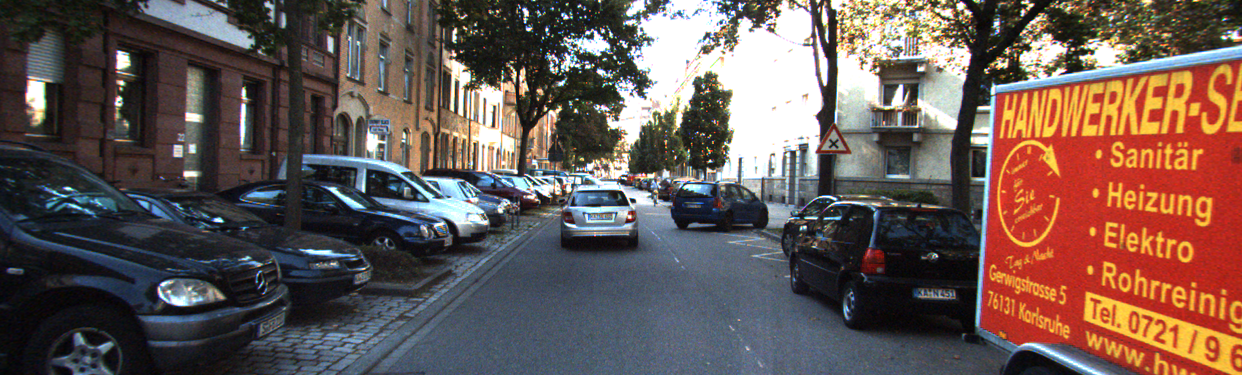

In [ ]:
example_idx = 0
img_path = test_img_files[example_idx]

img = cv2.imread(img_path)
cv2_imshow(img)

In [ ]:
model_base_dir = "/content/drive/MyDrive/Colab Notebooks/KITTI Dataset Exploration/models"

model_files = glob.glob(os.path.join(model_base_dir, "*.pt"))
model_files

['/content/drive/MyDrive/Colab Notebooks/KITTI Dataset Exploration/models/best.pt',
 '/content/drive/MyDrive/Colab Notebooks/KITTI Dataset Exploration/models/last.pt']

In [ ]:
best_model = model_files[0]
last_model = model_files[1]

In [ ]:
model = YOLO(best_model)

results = model(img_path)


image 1/1 /content/drive/MyDrive/Colab Notebooks/KITTI Dataset Exploration/YOLO_TRAIN_DATASET/test/images/000154_10.png: 224x640 1 road, 4 buildings, 2 vegetations, 1 sky, 3 cars, 48.9ms
Speed: 1.4ms preprocess, 48.9ms inference, 12.6ms postprocess per image at shape (1, 3, 224, 640)


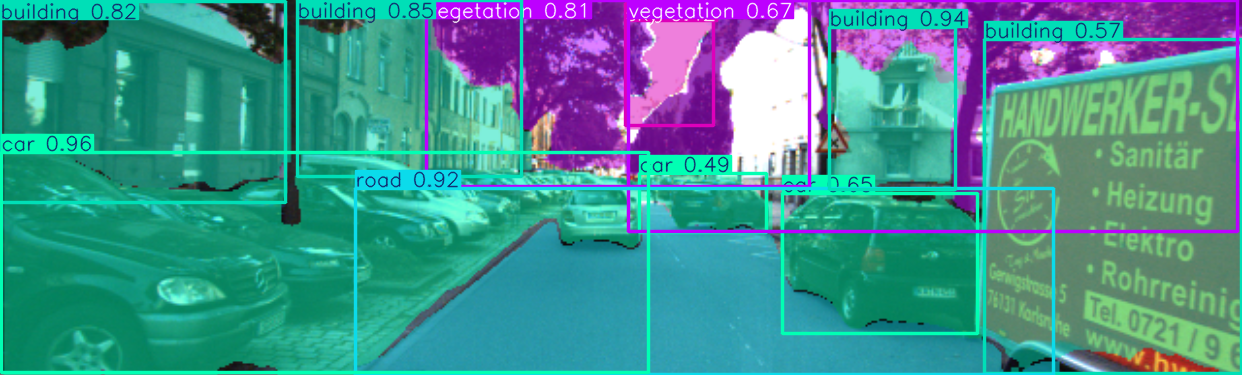

In [ ]:
for result in results:
    xy = result.masks.xy   # mask in polygon format
    xyn = result.masks.xyn # normalized
    masks = result.masks.data # mask in matrix format(num_objects x H x W)
    result.show()
    result.save(filename='output.png')

In [ ]:
results = model(img_path)[0]


image 1/1 /content/drive/MyDrive/Colab Notebooks/KITTI Dataset Exploration/YOLO_TRAIN_DATASET/test/images/000154_10.png: 224x640 1 road, 4 buildings, 2 vegetations, 1 sky, 3 cars, 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 2.8ms postprocess per image at shape (1, 3, 224, 640)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

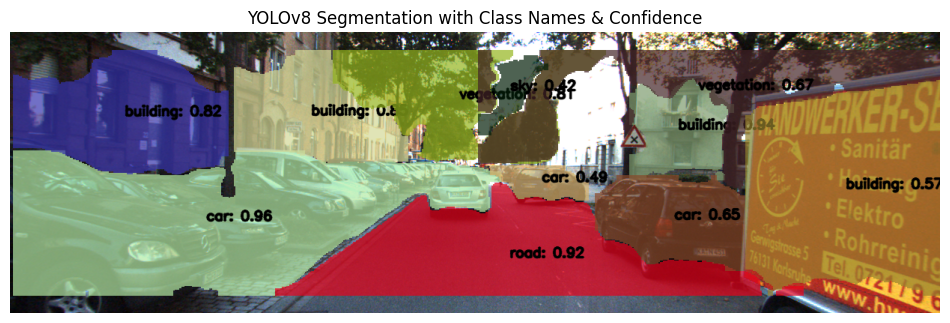

In [ ]:
# Load original image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
H, W, _ = img.shape

# Prepare overlay image
seg_overlay = img.copy()

# Extract masks, names, and confidences
masks = results.masks.data.cpu().numpy()        # shape: [N, h, w]
probs = results.probs if results.probs is not None else [round(c.item(), 2) for c in results.boxes.conf]
names = [results.names[int(cls)] for cls in results.boxes.cls]  # list of class names

# Resize and overlay each mask
for i, mask in enumerate(masks):
    # Resize mask to match original image
    resized_mask = cv2.resize(mask, (W, H), interpolation=cv2.INTER_NEAREST)
    binary_mask = (resized_mask > 0.5).astype(np.uint8)

    # Random color for each instance
    color = np.random.randint(0, 255, size=3).tolist()

    # Apply mask with transparency
    for c in range(3):
        seg_overlay[:, :, c] = np.where(
            binary_mask == 1,
            (seg_overlay[:, :, c] * 0.3 + color[c] * 0.7).astype(np.uint8),
            seg_overlay[:, :, c]
        )

    # Find centroid of mask to place text
    ys, xs = np.where(binary_mask == 1)
    if len(xs) > 0 and len(ys) > 0:
        cx, cy = int(np.mean(xs)), int(np.mean(ys))
        label = f"{names[i]}: {probs[i]:.2f}" if i < len(names) else f"Class{i}"
        cv2.putText(seg_overlay, label, (cx, cy), cv2.FONT_HERSHEY_SIMPLEX,
                    0.6, (0, 0, 0), 2, cv2.LINE_AA)

# Show final result
plt.figure(figsize=(12, 8))
plt.imshow(seg_overlay)
plt.axis('off')
plt.title('YOLOv8 Segmentation with Class Names & Confidence')
plt.show()